# Homework 3
# CS541 - Artificial Intelligence
# Shrawan Sapre



# Support Vector Machine

MNIST1 is a benchmark data set for classification. The full MNIST consists of 70,000 gray-scale images with size 28-by-28, each of which contains a digit from 0 to 9.


In the experiments, I use a part of it for binary classification. I have also used the raw pixel as the feature vector xi. Therefore, the feature dimension, d = 28 × 28 = 784.

# Process
1. Data Preparation
2. Evaluation metric
3. Convergence of SGD
4. Hyper-paramets
5. Noisy Labels

In [1]:
#Importing dependencies
import numpy as np
from matplotlib.pyplot import figure, imshow,axis
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn import preprocessing,linear_model
from sklearn.metrics import accuracy_score
import cv2 as cv
from PIL import Image
#For loading .mat files
import scipy.io as sio

# Data Preparation

In [2]:
#Loading dataset
data = sio.loadmat('Data/mnist_01.mat')

In [3]:
#Peaking the dataset
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Oct  8 14:05:55 2018', '__version__': '1.0', '__globals__': [], 'X_test': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'X_train': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'label_test': array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       

In [4]:
#Seperating the data into test and train sets
X_train = np.array(data['X_train'])
X_test = np.array(data['X_test'])
label_test = np.array(data['label_test'])
label_train = np.array(data['label_train'])

In [5]:
#Understanding the dimensions of the dataset
#No.of images or training samples = number of rows of dataset
number_of_train_images = (X_train.shape[0]) #10,000 train images

number_of_test_images = (X_test.shape[0])  #1,000 test images

#Size of 1 image = total number of columns of the dataset.
image_size = (X_train.shape[1])    #784 pixels in one image

We now check whether the labels and images in the training set match.
We check the validity of the data set provided.

 Random Training labels: 
[0] [0] [0] [0] [0] [0] [0] [0] [0] 



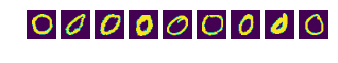

In [6]:
#Randomly pick 10 images from training set

#First, get 10 random indexes
random_index = np.random.randint(number_of_train_images, size=10)
#print(random_index)

#10 random images from training data
random_train_images = X_train[random_index, :]
#print(random_train_images)

fig = figure()
#Converting 784-dimensional row vectors of train and test samples into 28x28 images

print(' Random Training labels: ')

for i in range(0,random_index.size-1):
    train_images = random_train_images[i,:].reshape(28,28).T
    #Showing training images
    a=fig.add_subplot(1,random_index.size,i+1)
    imshow(train_images)
    axis('off')
    #Training labels
    print(label_train[random_index[i]],end =" ")
print("\n")

Testing Labels: [1] [1] [0] [1] [1] [1] [0] [0] [1] 



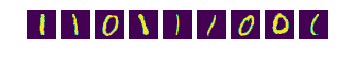

In [7]:
#Same as above for picking 10 images from test dataset
random_index_test = np.random.randint(number_of_test_images, size=10)
#print(random_index_test)

#10 random images from training data
random_test_images = X_test[random_index_test, :]
#print(random_test_images)
fig = figure()

print('Testing Labels: ',end ="")
for j in range(0,random_index_test.size-1):
    test_images = random_test_images[j,:].reshape(28,28).T
    #Showing test images
    b=fig.add_subplot(2,random_index_test.size,j+1)
    imshow(test_images)
    axis('off')
    #Training labels
    print(label_test[random_index_test[j]],end =" ")
print("\n")

In [8]:
#Normalize all feature vectors
#x_normalized_train_images = np.linalg.norm(X_train,axis = 1)
x_normalized_train_images = preprocessing.normalize(X_train, norm='l2')

x_normalized_test_images = preprocessing.normalize(X_test, norm='l2')

In [9]:
#Preparing the labels to feed to SVM
#All 0s are replaced by -1 in copies of labels

y_train = label_train.copy()
y_train = y_train.astype(int)
y_test = label_test.copy()
y_test = y_test.astype(int)

print(y_test)
for i in range(0,number_of_train_images):
    if(y_train[i]==0):
        y_train[i] = -1
    if i < 1000:
        if(y_test[i]==0):
            y_test[i] = -1
print(y_train)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


# Evaluation Metric (Accuracy)

In [10]:
#Evalutation metric (accuracy) function

def accuracy(w,X,y):
    n = X.shape[0]
    i = np.multiply(y,np.matmul(X,w))
    correct = np.sum(i[:,0]>0)
    acc = correct/n
    return acc

# Stochastic Gradient Descent

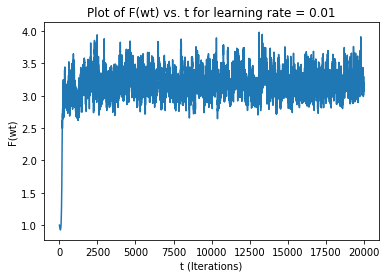

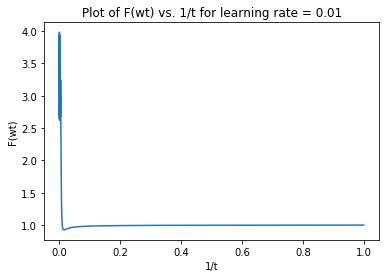


Please wait for one more graph to load...


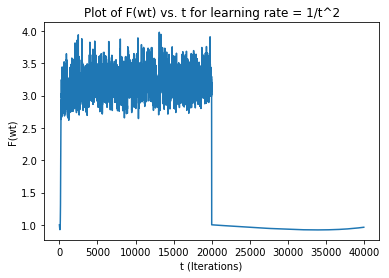

In [11]:
#2.3 Convergence of SGD

# Intializing Regularizer
lamda = 1

#Intializing the objective function
fw=[]

#Number of iterations
t = 20000

#Intializing fixed Learning rate
eta_set = [0.01, 1/(t^2)]

#F(w) = Hinge Loss + Regularizer
def svm_F(w,X,y,lamda):
    #Defining Hinge Loss
    hinge_loss = np.ones((y.shape[0],1)) - np.multiply(y,np.matmul(X,w))
    hinge_loss[hinge_loss<0] = 0
    
    #Adding the regularizer
    n = X.shape[0]
    F_w = (1/n*(np.sum(hinge_loss))) + (lamda/2*(np.linalg.norm(w)**2))
    return F_w


#Defining the SGD function
def sgd(X, Y, eta ,lamda,t):
    # Intializing the Weight matrix
    wt = np.zeros((784,1))     
        
    #Going through all the iterations    
    for j in range(1,t+1):
            i = np.random.choice(X.shape[0],size=1)
            #If misclassified
            if (np.matmul(Y[i]*X[i],wt) < 1):
                wt = wt- (eta * (-(Y[i]* np.transpose(X[i]) + (lamda* wt))))
            else:
                #If classified correctly
                wt = wt - eta * (lamda* wt)
            fw.append(svm_F(wt, x_normalized_train_images, y_train, lamda))
    return fw,t



#PLot for different learning rates
for i in eta_set:
    if i == 0.01:
        #Performing SGD
        fw,t_plot = sgd(x_normalized_train_images, y_train, i, lamda,t)

        #Plotting F(wt) vs. t
        plt.figure()
        plt.title('Plot of F(wt) vs. t for learning rate = 0.01')
        plt.xlabel('t (Iterations)')
        plt.ylabel('F(wt)')
        plt.plot(range(1,t_plot+1),fw)
        plt.show()
    
        #Plotting F(wt) vs. 1/t
        plt.figure()
        plt.title('Plot of F(wt) vs. 1/t for learning rate = 0.01')
        plt.xlabel('1/t')
        plt.ylabel('F(wt)')
        plt.plot(list(map(lambda t_plot:1/t_plot, range(1,t_plot+1))),fw)
        plt.show()
        print("\nPlease wait for one more graph to load...")
    else:
        #Performing SGD
        fw,t_plot = sgd(x_normalized_train_images, y_train, i, lamda,t)
        #Finding fw with learning rate = 1/t^2
        plt.figure()
        plt.title('Plot of F(wt) vs. t for learning rate = 1/t^2')
        plt.xlabel('t (Iterations)')
        plt.ylabel('F(wt)')
        plt.plot(fw)
        plt.show()

# Hyper-parameters

	  λ		 ||w^10000||2/d
	----------------------------------
	1e-06		0.6305179725142026
	0.0001		0.013888717279597647
	0.1		0.0029227013438695043
	0.5		0.0010145529745584332
	1		0.0005085676303963707
	2		0.00025389398571718343
	5		0.00010146534875764146
	10		5.099165581063932e-05
	20		2.537410544782897e-05
	50		1.0167181410453143e-05
	100		5.1031328080214425e-06
	500		1.0178873602748522e-06
	1000		5.078363837820222e-07
	10000		5.083498408716962e-08


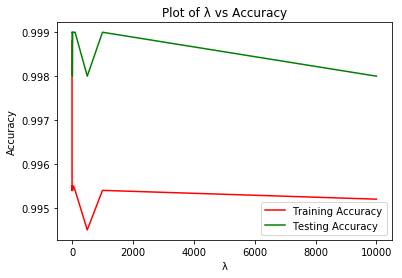

Optimum lambda = 1e-06


In [12]:
#2.4-Hyper Parameters

#No. of iterations
t=10000

#Hyper-parameter set
lambda_set = [0.000001,0.0001,0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 500, 1000, 10000]


#Initializing train, test accuracies and weight matrix
train_acc = []
test_acc = []
w = []

print("\t  λ\t\t ||w^10000||2/d")
print("\t----------------------------------")

#Computing accuracies
for lamda in lambda_set:
    wt= np.zeros((784,1))    
    for itr in range(1,t+1):
        img = np.random.choice(X_train.shape[0],size=1)
        
        #Natural learning rate
        eta = 1/(lamda*itr)
        
        #If misclassified
        if (np.matmul(y_train[img]*x_normalized_train_images[img],wt) < 1):
            wt = wt - (eta * ((-y_train[img]* np.transpose(x_normalized_train_images[img])) + (lamda* wt)))
        else:
            #If classified correctly
            wt = wt - (eta * (lamda* wt))
    w.append(wt)
    train_acc.append(accuracy(wt, x_normalized_train_images, y_train))
    test_acc.append(accuracy(wt, x_normalized_test_images, y_test))
    print('\t'+ str(lamda) + '\t\t' + str(np.linalg.norm(wt) / wt.shape[0]))                

#Plotting test and train accuracies
plt.figure()
plt.title("Plot of λ vs Accuracy")
plt.plot(lambda_set, train_acc,  color='red')
plt.plot(lambda_set, test_acc,  color='green')
plt.xlabel("λ")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()



#Hard-Thresholding

#Optimal lambda and w
optimum_index = test_acc.index(max(test_acc))
lambda_optimum = lambda_set[optimum_index]
w_optimum = w[optimum_index]

print("Optimum lambda = "+str(lambda_optimum))





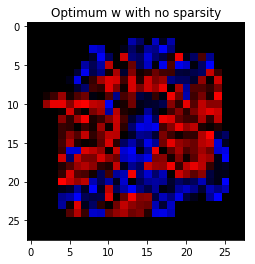

In [13]:
#Visualizing function for optimal w
def visualize(w):
    r=[]
    b= []
    w_opti_r=0
    w_opti_b =0
    w_opti=0
    for i in w:
        if i>=0:
            b.append(i)
            r.append(0)
        elif i<=0:
            r.append(abs(i))
            b.append(0)
            
    red_channel = np.asarray(r)
    blue_channel = np.asarray(b)
    red_channel = np.reshape(red_channel,(28,28)).T
    blue_channel = np.reshape(blue_channel,(28,28)).T
    green_channel = np.zeros((28,28))
    rb_image = np.zeros((28,28,3), 'uint8')
    rb_image[...,0] = red_channel*256
    rb_image[...,1] = green_channel*256
    rb_image[...,2] = blue_channel*256
    
    img = Image.fromarray(rb_image)
    return img


img = visualize(w_optimum)
imshow(img)
plt.title("Optimum w with no sparsity")
plt.show()

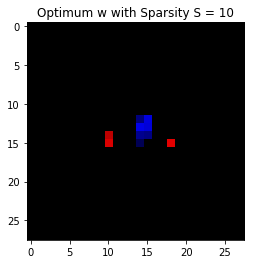

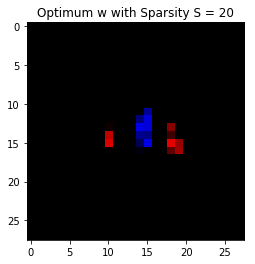

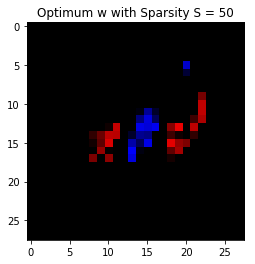

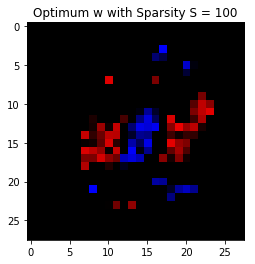

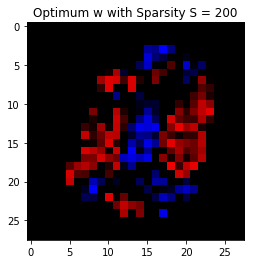

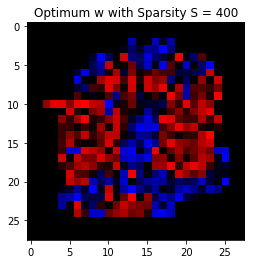

Test accuracy for s = 10 is 0.793
Test accuracy for s = 20 is 0.89
Test accuracy for s = 50 is 0.999
Test accuracy for s = 100 is 0.999
Test accuracy for s = 200 is 0.999
Test accuracy for s = 400 is 0.999


In [14]:
#Hard Thresholding with Sparsity
def hard_thresh(s, w):
    
    w_n = np.matrix.copy(w)
    
    #S largest values in partition
    s_largest = np.partition(np.absolute(w_n).flatten(), -s)[-s]
    
    #hard threshold values less than the third largest magnitude
    w_n[np.absolute(w_n) < s_largest] = 0
    return w_n

#Testing out different sparsity values and plotting optimum w for them
new_test_acc = []
s_values = [10, 20, 50, 100, 200, 400]
for s in s_values:
    w_new = hard_thresh(s,w_optimum)
    image = visualize(w_new)
    imshow(image)
    plt.title("Optimum w with Sparsity S = "+str(s))
    plt.show()
    new_test_acc.append(accuracy(w_new, x_normalized_test_images, y_test))

#Test accuracies for different values of s
for i in range(len(s_values)):
    print("Test accuracy for s = "+ str(s_values[i])+ " is " + str(new_test_acc[i]))


# Noisy Labels


In [15]:
#Including noisy labels
noise_levels = [0, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7]
lambda_set2 = [10 ** -6, 10 ** -3, 0.1, 0.5, 1, 5, 10, 20, 50]

print('p' + '\tlambda*\t ' +  ' training accuracy\t' +'testing accuracy\t' + '  ||w*||2/d')

for p in noise_levels:
    
    #Generating the noisy labels
    y_train_noisy = np.copy(y_train)
    random_labels = np.random.choice(y_train_noisy.shape[0], size=int(y_train_noisy.shape[0] * p), replace = False)
    y_train_noisy[random_labels] *= -1
    
    t_final=5000
    w_final = []
    final_test_acc = []
       
    for lamda in lambda_set2:
        wt= np.zeros((784,1))    
        for itr in range(1,t_final+1):
            img = np.random.choice(x_normalized_train_images.shape[0],size=1)
            
            #Natural learning rate
            eta = 1/(lamda*itr)
            
            #If misclassified
            if (np.matmul(y_train_noisy[img]*x_normalized_train_images[img],wt) < 1):
                wt = wt - (eta * ((-y_train_noisy[img]* np.transpose(x_normalized_train_images[img])) + (lamda* wt)))
            else:
                #If classified correctly
                wt = wt - (eta * (lamda* wt))
        w_final.append(wt)
        final_test_acc.append(accuracy(wt, x_normalized_test_images, y_test))
    
    #Obtain optimal lambda and w
    final_opt = final_test_acc.index(max(final_test_acc))                 
    final_lamda_optimum = lambda_set2[final_opt]
    final_w_optimum = w_final[final_opt]
    
    #results
    print(str(p) + '\t '+ str(final_lamda_optimum) + '\t\t'+str(accuracy(final_w_optimum, x_normalized_train_images, y_train)) +'\t\t\t'+ str(accuracy(final_w_optimum, x_normalized_test_images, y_test)) + '\t\t'+str(np.linalg.norm(final_w_optimum) / final_w_optimum.shape[0]))
    

p	lambda*	  training accuracy	testing accuracy	  ||w*||2/d
0	 1e-06		0.9973			1.0		1.042664748497668
0.01	 0.001		0.9983			1.0		0.006234546579876472
0.1	 0.001		0.998			1.0		0.005433249152235086
0.2	 0.001		0.9981			1.0		0.0058992404911937645
0.3	 1		0.9959			0.999		0.000199180889603436
0.5	 50		0.7435			0.832		2.7943453301158555e-07
0.7	 1e-06		0.3388			0.37		2.482759712512296


# End